# An Introduction to Machine Learning
In this notebook we will work through a credit risk problem as a hands on method for introducing you to machine learning. Our focus will be on introducing you to the steps required to predict an outcome. In this lecture, we will focus on using a logisitic regression to automate the loan approval process at a small bank.

This small banks wants to automate the loan eligibilty process based on a few customer details that are provided during the application process. These details contain basic information about the loan customer such as: gender, marital status, number of dependends, education level, employment, income, co-applicant income, loan amount, loan term, credit history, and property area. We are given the task of creating a model that will classify customers into one of two groups, those that should get a loan and those that should not. In order to create this model, we have been given a data set that contains the outcome of the loan process. This `labeled data` is how we will train our model.

## 1. Understanding our data

* Variable: Description
* Loan_ID: Unique Loan ID
* Gender: Male/ Female
* Married: Applicant married (Y/N)
* Dependents: Number of dependents
* Education: Applicant Education (Graduate/ Under Graduate)
* Self_Employed: Self employed (Y/N)
* ApplicantIncome: Applicant income
* CoapplicantIncome: Coapplicant income
* LoanAmount: Loan amount in thousands
* Loan_Amount_Term: Term of loan in months
* Credit_History: credit history meets guidelines
* Property_Area: Urban/ Semi Urban/ Rural
* Loan_Status: Loan approved (Y/N)

## 2. Import required libraries

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# calculate confusion matrix
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings('ignore')

## 3. Import data and inspect it

In [2]:
df = pd.read_csv('CreditRisk.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,141.166124,88.340630,0.0,98.0,125.0,164.75,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0
Loan_Status,614.0,0.687296,0.463973,0.0,0.0,1.0,1.00,1.0


In [6]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

### Insights
- Loan ID is a unique variable for each entry and has zero repeating values. We can drop this variable.
- Gender, married, dependends, education, self employed, credit history, property area, and loan status are all categorical variables. Some of these are currently text and some are numeric.
- The remaining variables are continuous (applicant income, coapplicant income, loan amount, loan term).

## 4. Explore the data in more detail

In [7]:
df = df.drop(columns = 'Loan_ID')
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
154,Male,No,0,Graduate,No,3254,0.0,50,360.0,1.0,Urban,1
91,Male,Yes,2,Graduate,No,6250,5654.0,188,180.0,1.0,Semiurban,1
148,Female,No,0,Graduate,No,10000,1666.0,225,360.0,1.0,Rural,0
319,Male,Yes,1,Graduate,Yes,10000,0.0,155,360.0,1.0,Rural,0
61,Male,Yes,3+,Graduate,No,3029,0.0,99,360.0,1.0,Urban,1


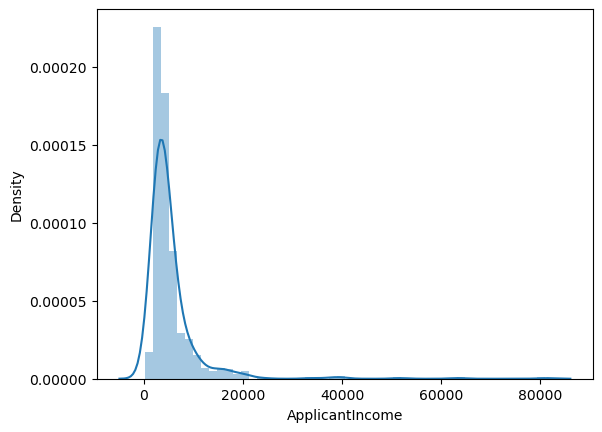

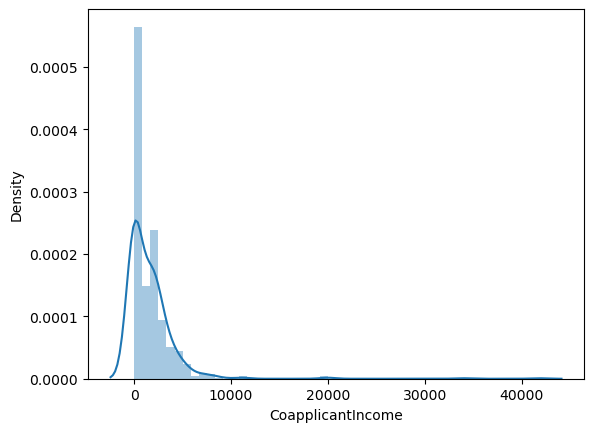

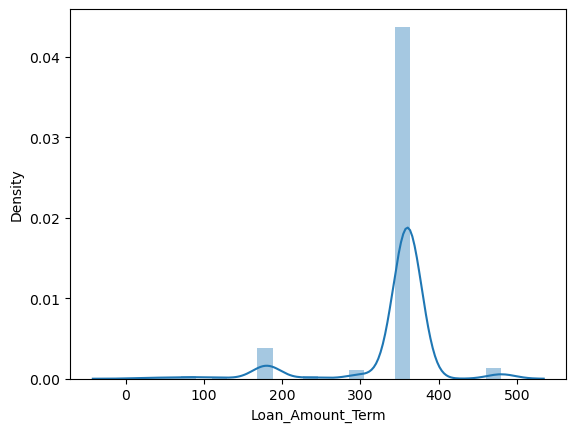

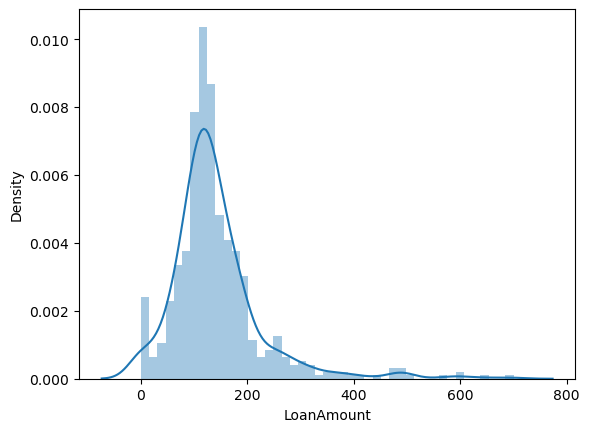

In [8]:
# distplot for continous columns
for i in ['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','LoanAmount']:
    sns.distplot(df[i])
    plt.show()

### Insights
- It seems that Loan Amount Term may be a categorical variable after all. We will want to address this for later analysis.
- For the other variables, we can see that they are all right skewed. Even though we will not do anything about this information right now, it is good to know what our data looks like.

In [9]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [10]:
df['Loan_Amount_Term'].value_counts(normalize=True)

Loan_Amount_Term
360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
240.0    0.006667
84.0     0.006667
120.0    0.005000
60.0     0.003333
36.0     0.003333
12.0     0.001667
Name: proportion, dtype: float64

### Insights
We can see that there are only a few values that appear with any real frequency here. 360 (ie. thirty years) account for just over 85% of the observations. 180 accounts for just over 7% of the observations. The remaining values are all 2.5% or less. Because this variable is so highly skewed with so many observations taking on the value of 360, we will drop this variable from our analysis.

In [11]:
df = df.drop(columns=['Loan_Amount_Term'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,1.0,Urban,1


In [12]:
# We can convert a few of our categorical variables to the categorical data type for easier use
# We will only focus on those that are already numerical variables here

df['Loan_Status'] = df['Loan_Status'].astype('category')
df['Credit_History'] = df['Credit_History'].astype('category')
df.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount              int64
Credit_History       category
Property_Area          object
Loan_Status          category
dtype: object

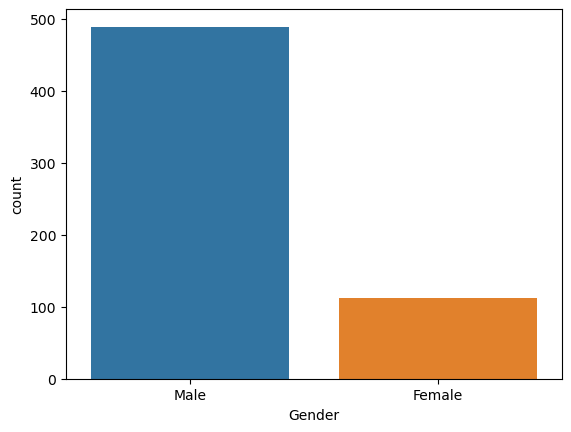

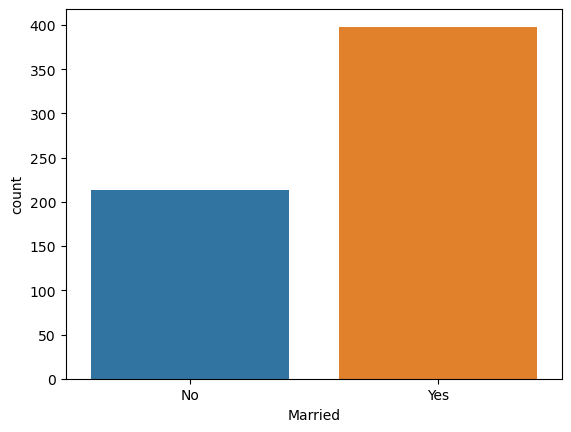

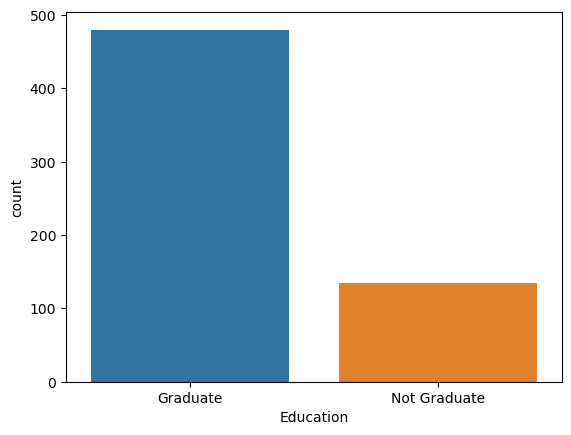

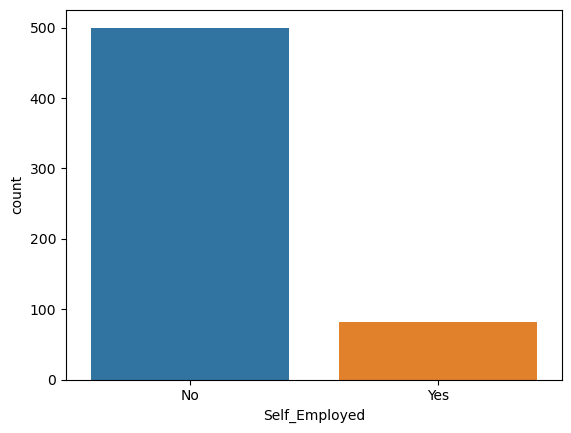

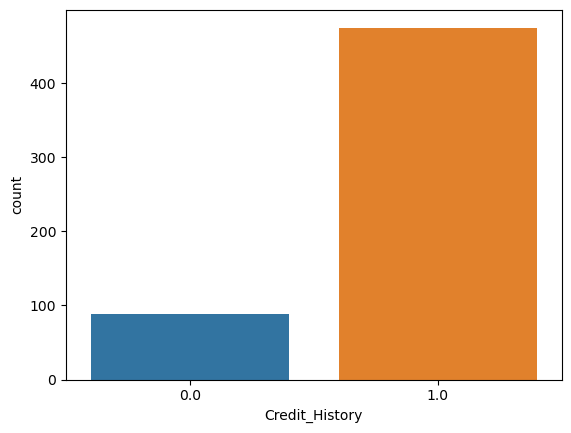

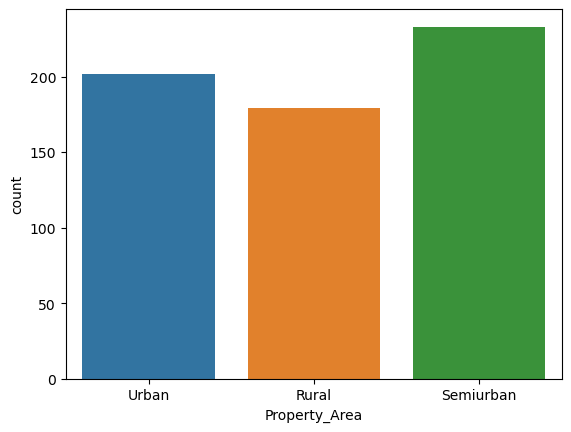

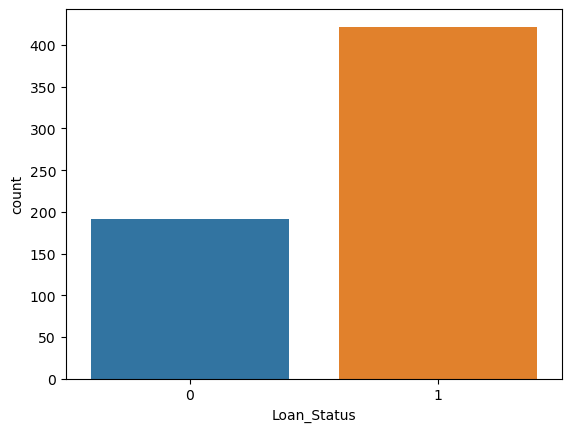

In [13]:
# We can visualize the distribution of categorical variables here
for i in ['Gender','Married','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']:
    sns.countplot(x = df[i])
    plt.show()

## 5. Missing Values
How and when we deal with missing values is an important part of machine learning. We will discuss our decision making in the steps below.

In [14]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can choose to fill in credit history, self employed, and married here because I am going to fill them in with values of 0. My decision to fill in values of 0 does not rely on values within the dataset. I am making this decision on my own. We will dicuss why this is important at a later step in the data preparation process.

In [15]:
df['Credit_History'].fillna(0, inplace=True)
df['Self_Employed'].fillna('No', inplace=True)
df['Married'].fillna('No', inplace=True)
df.isnull().sum()

Gender               13
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

How we choose to fill in the remaining variables will be dependend on the data (ie. maybe we fill in with mean or median values). At this point in the process we are not able to fill these in because we must create a training and testing dataset from our primary data. This will become more clear as we move forward.

## 6. Bivariate Analysis
In this analysis we have a clear question related to Loan Status. Before actually creating the logistic regression model, we can look at some of the relationships to get a better understanding of what we expect to find.

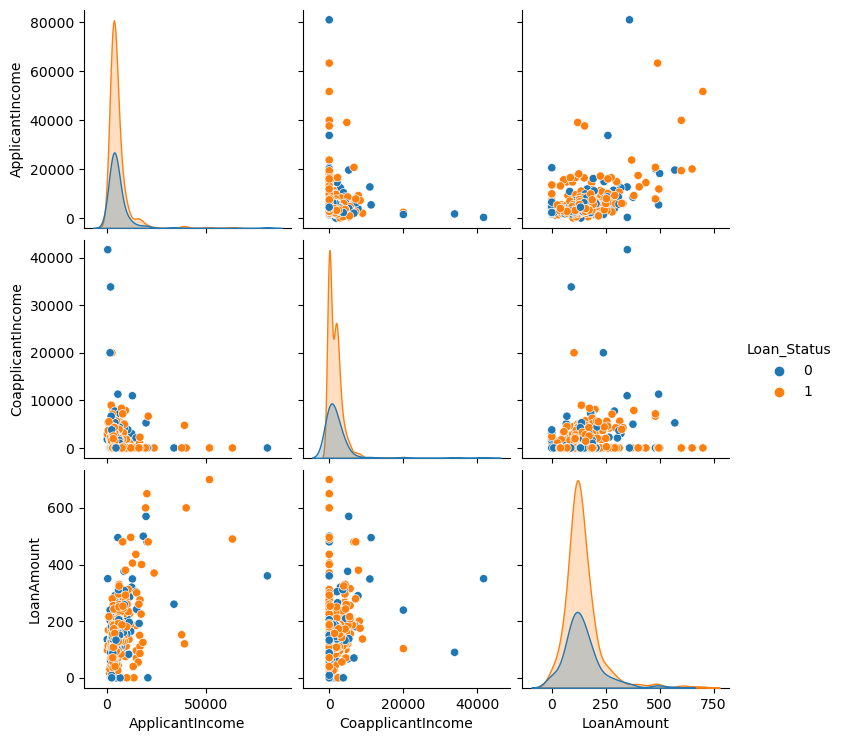

In [16]:
sns.pairplot(df, hue = 'Loan_Status')

In [17]:
explore_vars = ['Credit_History', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']

for i in explore_vars:
    display(pd.crosstab(df[i], df['Loan_Status'], normalize = 'index'))

Loan_Status,0,1
Credit_History,,
0.0,0.683453,0.316547
1.0,0.204211,0.795789


Loan_Status,0,1
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


Loan_Status,0,1
Married,,
No,0.365741,0.634259
Yes,0.283920,0.716080


Loan_Status,0,1
Education,,
Graduate,0.291667,0.708333
Not Graduate,0.388060,0.611940


Loan_Status,0,1
Self_Employed,,
No,0.312030,0.687970
Yes,0.317073,0.682927


Loan_Status,0,1
Property_Area,,
Rural,0.385475,0.614525
Semiurban,0.231760,0.768240
Urban,0.341584,0.658416


Loan_Status,0,1
Dependents,,
0,0.310145,0.689855
1,0.352941,0.647059
2,0.247525,0.752475
3+,0.352941,0.647059


### Insights
- We observe no relationship between loan status and income or loan amount. However, we do find that higher coapplicant income is associated with those who take a loan.
- We find a strong relationship between having a credit history and taking a loan.
- We observe no clear relationship between gender and loan status.
- There is a slight increase in the likeihood of taking a loan if you are married.
- There is a slight increase in the likeihood of taking a loan if you have an education status of graduate.
- We observe no clear relationship between self-employed and loan status.
- We find that those living in a semiurban area are most likely to get approved, followed by those in an urban area, and finally the least likely are those in a rural area.
- There may be an increased likelihood of getting a loan if you have 2 dependents, but the relationship is not clear.

## 7. Model Preparation
We will finalize our data preparation for modeling.

In [18]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,1.0,Urban,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             601 non-null    object  
 1   Married            614 non-null    object  
 2   Dependents         599 non-null    object  
 3   Education          614 non-null    object  
 4   Self_Employed      614 non-null    object  
 5   ApplicantIncome    614 non-null    int64   
 6   CoapplicantIncome  614 non-null    float64 
 7   LoanAmount         614 non-null    int64   
 8   Credit_History     614 non-null    category
 9   Property_Area      614 non-null    object  
 10  Loan_Status        614 non-null    category
dtypes: category(2), float64(1), int64(2), object(6)
memory usage: 44.7+ KB


In [20]:
# We must separate out our explanatory variables (X) from our target variable (y)

X = df.drop(columns = 'Loan_Status')
y = df['Loan_Status']

In [21]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141,1.0,Urban


We will now create a training and testing dataset from our X and y data. The reason we do this is to ensure that we are able to train our model on one set of data and then test the performance of that model on data that has not yet been seen. By doing this we are able to determine how well our model will perform on out-of-sample data. Our goal is to create a model that will perform as well on the `test` data as it does on the `training` data. We will use a new library for this and we will split out data into 70% for training and 30% for testing.

In [22]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=123)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (429, 10)
y_train: (429,)
X_test: (185, 10)
y_test: (185,)


We are now ready to fill in the remaining missing values. These are the missing values that we are going to fill in with a mean or median determined from the data. Think about why we could not do this step until after we created our training and testing data...if we had done this earlier we would have experienced data leakage. We need to ensure that no information from our training data is found within the testing data. By using the full sample to fill in these missing values, we would have used information from every observation to calculate the mean/median value which results in both training and testing observations being used. We wait until now to ensure we fill in the missing values with only information from each respective dataset.

In [23]:
X_train.isnull().sum()

Gender                8
Married               0
Dependents           10
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History        0
Property_Area         0
dtype: int64

In [24]:
# Drawing relationship between CoapplicantIncome and Gender...this is just one possible way of filling in a missing value

X_train.groupby('Gender')['CoapplicantIncome'].median()

Gender
Female       0.0
Male      1400.0
Name: CoapplicantIncome, dtype: float64

In [25]:
X_train['Gender'].value_counts()

Gender
Male      335
Female     86
Name: count, dtype: int64

### Insights
When Coapplicant Income is 0 and gender is missing, we can fill it with `Female` otherwise we will fill it with `Male`

In [26]:
X_train.loc[X_train['Gender'].isna() & (X_train['CoapplicantIncome'] == 0), 'Gender'] = 'Female'
X_train.loc[X_train['Gender'].isna() & (X_train['CoapplicantIncome'] != 0), 'Gender'] = 'Male'

X_train['Gender'].value_counts()

Gender
Male      338
Female     91
Name: count, dtype: int64

In [27]:
X_train['Dependents'].value_counts()

Dependents
0     247
1      71
2      69
3+     32
Name: count, dtype: int64

In [28]:
# We will fill in the dependents with the mode

X_train['Dependents'].fillna(0, inplace=True)

In [29]:
X_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
dtype: int64

In [30]:
# Repeat the above process for the testing data separately

X_test.isnull().sum()

Gender               5
Married              0
Dependents           5
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
dtype: int64

In [31]:
# Drawing relationship between CoapplicantIncome and Gender...this is just one possible way of filling in a missing value

X_test.groupby('Gender')['CoapplicantIncome'].median()

Gender
Female       0.0
Male      1697.5
Name: CoapplicantIncome, dtype: float64

In [32]:
X_test.loc[X_test['Gender'].isna() & (X_test['CoapplicantIncome'] == 0), 'Gender'] = 'Female'
X_test.loc[X_test['Gender'].isna() & (X_test['CoapplicantIncome'] != 0), 'Gender'] = 'Male'
X_test['Gender'].value_counts()

Gender
Male      158
Female     27
Name: count, dtype: int64

In [33]:
X_test['Dependents'].value_counts()

Dependents
0     98
2     32
1     31
3+    19
Name: count, dtype: int64

In [34]:
# We will fill in the dependents with the mode

X_test['Dependents'].fillna(0, inplace=True)

In [35]:
X_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
dtype: int64

In [36]:
X_train['Gender'].value_counts()

Gender
Male      338
Female     91
Name: count, dtype: int64

In [37]:
# We must now convert our categorical/object variables to dummy variables

X_train = pd.get_dummies(X_train, columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)
X_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
105,3052,1030.0,100,1.0,True,True,False,True,False,False,False,False,False,True
471,2653,1500.0,113,0.0,True,True,False,True,False,False,True,False,False,False
114,5050,0.0,118,1.0,True,False,True,False,False,False,False,False,True,False
91,6250,5654.0,188,1.0,True,True,False,False,True,False,False,False,True,False
562,5923,2054.0,211,1.0,True,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,4188,0.0,115,1.0,True,True,True,False,False,False,True,False,True,False
322,3601,1590.0,0,1.0,True,True,False,False,True,False,True,False,False,False
382,6000,0.0,156,1.0,False,False,True,False,False,False,False,False,False,True
365,6216,0.0,133,1.0,True,False,True,False,False,False,True,False,False,False


In [38]:
X_test = pd.get_dummies(X_test, columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)
X_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
583,1880,0.0,61,0.0,True,True,False,True,False,False,False,False,False,False
11,2500,1840.0,109,1.0,True,True,False,False,True,False,False,False,False,True
443,37719,0.0,152,1.0,True,False,False,True,False,False,False,False,True,False
442,4707,1993.0,148,1.0,True,False,False,False,False,True,True,False,True,False
267,4333,1811.0,160,0.0,True,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,2679,1302.0,94,1.0,True,False,False,True,False,False,True,False,True,False
289,9508,0.0,187,1.0,True,False,True,False,False,False,False,False,False,False
425,2666,4300.0,121,1.0,True,True,True,False,False,False,False,False,False,False
294,2383,3334.0,172,1.0,True,True,True,False,False,False,False,False,True,False


## 8. Model Creation
We will use the sklearn library to create our logistic regression model and to determine how well the model performs.

In [39]:
logreg = LogisticRegression(random_state=123, fit_intercept=False, max_iter = 1000)
logreg.fit(X_train, y_train)                    

LogisticRegression(fit_intercept=False, max_iter=1000, random_state=123)

In [40]:
y_predict = logreg.predict(X_test)

In [41]:
# Observe the predicted and observed classes in a dataframe.

z = X_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Observed Loan Status,Predicted Loan Status
583,1880,0.0,61,0.0,True,True,False,True,False,False,False,False,False,False,0,1
11,2500,1840.0,109,1.0,True,True,False,False,True,False,False,False,False,True,1,1
443,37719,0.0,152,1.0,True,False,False,True,False,False,False,False,True,False,1,0
442,4707,1993.0,148,1.0,True,False,False,False,False,True,True,False,True,False,1,1
267,4333,1811.0,160,0.0,True,True,False,False,False,True,False,False,False,True,1,1


In [42]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy: 0.711

Testing accuracy: 0.665

Confusion Matrix


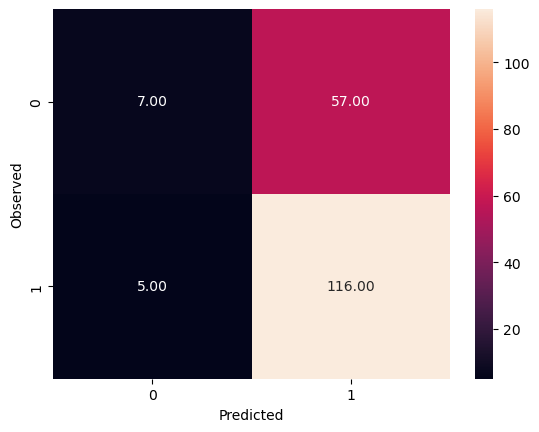

None


In [43]:
print("Training accuracy: {:.3f}".format(logreg.score(X_train,y_train)))  
print()
print("Testing accuracy: {:.3f}".format(logreg.score(X_test, y_test)))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))

In [44]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
3,Credit_History,0.99
12,Property_Area_Semiurban,0.36
5,Married_Yes,0.34
4,Gender_Male,0.24
6,Dependents_0,0.23
8,Dependents_2,0.14
10,Education_Not Graduate,0.05
13,Property_Area_Urban,0.04
11,Self_Employed_Yes,0.02
7,Dependents_1,0.01


##### `Confusion matrix means`

*True Positive (observed=1,predicted=1):*

Predicted that home loan will be granted and the customer was eligibile for loan

*False Positive (observed=0,predicted=1):*

Predicted that home loan will be granted and the customer was not eligibile for loan

*True Negative (observed=0,predicted=0):*

Predicted that home loan will not be granted and the customer was not eligibile for loan

*False Negative (observed=1,predicted=0):*

Predicted that home loan will not be granted and the customer was eligibile for loan

##### `Important Features`

Based on the coefficients value: Credit History, Education - Not Graduated, and semiurban location are the three most important characteristics. However, we can see that the importance of Education - Not Graduated is negative which means these individuals are significantly less likely to get a loan. We must take notice of the magnitude and direction of the coefficients to truly understand what the data is telling us.